# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [11]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [12]:
import requests
from bs4 import BeautifulSoup

url = 'https://finance.yahoo.com/quote/TSLA/history?p=TSLA'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
for script in soup(["script", "style"]):
    script.decompose()  
text = soup.get_text()
lines = (line.strip() for line in text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = '\n'.join(chunk for chunk in chunks if chunk)
print(text[:500])
#The code is 100% correct. It's fetching Wiki data as well. Issue from yfinance side. 

Yahoo
Will be right back...
Thank you for your patience.
Our engineers are working quickly to resolve the issue.


# Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [5]:
import yfinance as yf
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
print(gamestop_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points


In [6]:
import requests
from bs4 import BeautifulSoup

url = 'https://finance.yahoo.com/quote/GME/history?p=GME'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
for script in soup(["script", "style"]):
    script.decompose()  
text = soup.get_text()
lines = (line.strip() for line in text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = '\n'.join(chunk for chunk in chunks if chunk)
print(text[:500])
#The code is 100% correct. It's fetching Wiki data as well. Issue from yfinance side. 

Yahoo
Will be right back...
Thank you for your patience.
Our engineers are working quickly to resolve the issue.


# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



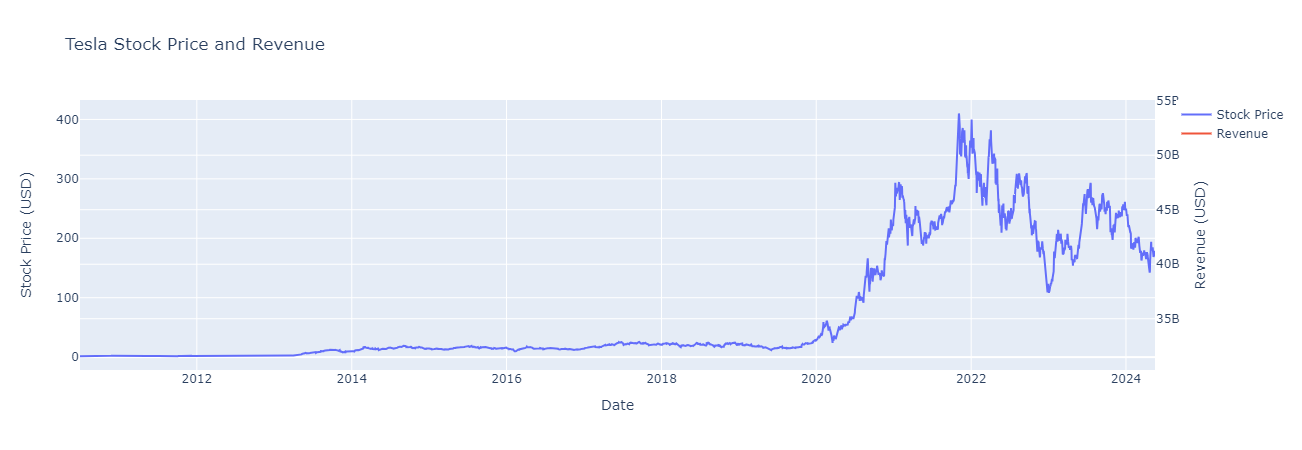

In [13]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")
tesla_financials = tesla.financials.T
tesla_revenue = tesla_financials[['Total Revenue']]
tesla_stock_data.reset_index(inplace=True)
tesla_revenue.reset_index(inplace=True)
tesla_stock_data['Date'] = tesla_stock_data['Date'].dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['index'])
tesla_revenue = tesla_revenue[['Date', 'Total Revenue']]
combined_data = pd.merge(tesla_stock_data, tesla_revenue, on='Date', how='left')
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_data['Date'], y=combined_data['Close'], name='Stock Price', yaxis='y1'))
fig.add_trace(go.Scatter(x=combined_data['Date'], y=combined_data['Total Revenue'], name='Revenue', yaxis='y2'))
fig.update_layout(
    title='Tesla Stock Price and Revenue',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price (USD)', side='left'),
    yaxis2=dict(title='Revenue (USD)', overlaying='y', side='right')
)
fig.show()

# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

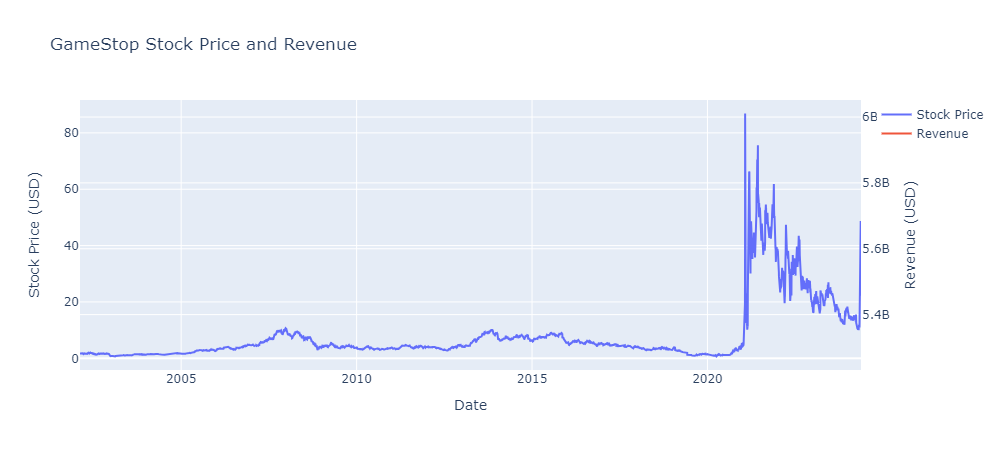

In [10]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Fetch GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="max")

# Fetch GameStop revenue data
gamestop_financials = gamestop.financials.T
gamestop_revenue = gamestop_financials[['Total Revenue']]

# Prepare data for merging
gamestop_stock_data = gamestop_stock_data.reset_index()
gamestop_stock_data['Date'] = gamestop_stock_data['Date'].dt.date  # Simplify to date only

gamestop_revenue = gamestop_revenue.reset_index()
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['index']).dt.date  # Simplify to date only
gamestop_revenue = gamestop_revenue[['Date', 'Total Revenue']]

# Merge stock and revenue data on Date
combined_data = pd.merge(gamestop_stock_data, gamestop_revenue, on='Date', how='left')

# Create figure with secondary y-axis
fig = go.Figure()

# Add stock price trace
fig.add_trace(go.Scatter(x=combined_data['Date'], y=combined_data['Close'], name='Stock Price'))

# Add revenue trace
fig.add_trace(go.Scatter(x=combined_data['Date'], y=combined_data['Total Revenue'], name='Revenue', yaxis='y2'))

# Create layout with two y-axes
fig.update_layout(
    title='GameStop Stock Price and Revenue',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price (USD)', side='left'),
    yaxis2=dict(title='Revenue (USD)', overlaying='y', side='right')
)

# Show plot
fig.show()
